<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/ML/Urvashi_Ramdasani_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted By : Urvashi Ramdasani

## Task A


1) Develop a program to create recommendation system to recommend
products to a customer on a website like flipkart. Recommendations should be
based on the products consumer has searched on other sites like Google or
Amazon.

2) You can use any programming language to do this

3) Create a sample data set for implementing the feature.

4) Drive information by analyzing the data set you have made and present
valuable information from it in a presentable format.

In [ ]:
# Import all libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import random
import math
import re
from collections import Counter

In [ ]:
data = pd.read_csv("product-dataset.csv")
data

,Customer ID,Search String
0,CUST001,NaN
1,CUST002,NaN
2,CUST003,NaN
3,CUST004,NaN
4,CUST005,NaN
...,...,...
245,CUST246,NaN
246,CUST247,NaN
247,CUST248,NaN
248,CUST249,NaN


In [ ]:
# Generating Dataset
# Assuming that two classes of products - Mobile, Computers and Women Clothing are available.

search_terms = ["Mobiles", "Tablets & More", "All Mobile Phones", "All Mobile Accessories", "Cases & Covers", "Screen Protectors", "Power Banks", 
                "Refurbished & Open Box", "Tablets", "Wearable Devices", "Smart Home", "Office Supplies & Stationery", "Software", "Computers & Accessories",
                "All Computers & Accessories", "Laptops", "Drives & Storage", "Printers & Ink", "Networking Devices", "Computer Accessories", "Game Zone"
                "Monitors", "Desktops", "Components", "Women's Clothing", "Clothing", "Western Wear", "Ethnic Wear", "Lingerie & Nightwear", "Top Brands", 
                "Accessories", "Watches", "Handbags & Clutches", "Gold & Diamond Jewellery", "Fashion & Silver Jewellery", "Sunglasses", "Women's Shoes", 
                "Shoes", "Fashion Sandals", "Ballerinas"]

In [ ]:
# Randomly assigning random number of search terms to customer IDs. 

for i in range(len(data)):
  n = random.randint(2, 10)
  data['Search String'][i] = ""
  for j in range(n):
    item_no = random.randint(0, len(search_terms) - 1)
    data['Search String'][i] = data['Search String'][i] + search_terms[item_no] + ","

data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Customer ID,Search String
0,CUST001,"Laptops,Western Wear,Refurbished & Open Box,Go..."
1,CUST002,"Women's Clothing,Accessories,Drives & Storage,..."
2,CUST003,"Watches,Computer Accessories,Computer Accessor..."
3,CUST004,"Office Supplies & Stationery,All Computers & A..."
4,CUST005,"Laptops,Office Supplies & Stationery,Ballerinas,"
...,...,...
245,CUST246,"Lingerie & Nightwear,Cases & Covers,Tablets,La..."
246,CUST247,"Refurbished & Open Box,Watches,Computers & Acc..."
247,CUST248,"Printers & Ink,Wearable Devices,Wearable Devic..."
248,CUST249,"Mobiles,Drives & Storage,Sunglasses,Fashion Sa..."


In [ ]:
# Getting a list of all search strings

document = []

for i in range(len(data)):
  document.append(data['Search String'][i])

document

["Laptops,Western Wear,Refurbished & Open Box,Gold & Diamond Jewellery,Top Brands,Women's Clothing,",
 "Women's Clothing,Accessories,Drives & Storage,Desktops,Ballerinas,Mobiles,Gold & Diamond Jewellery,",
 'Watches,Computer Accessories,Computer Accessories,Mobiles,Smart Home,Smart Home,Handbags & Clutches,Gold & Diamond Jewellery,Gold & Diamond Jewellery,Shoes,',
 'Office Supplies & Stationery,All Computers & Accessories,Smart Home,Shoes,Refurbished & Open Box,Wearable Devices,Ethnic Wear,',
 'Laptops,Office Supplies & Stationery,Ballerinas,',
 'Ethnic Wear,Ballerinas,Lingerie & Nightwear,Fashion Sandals,All Mobile Accessories,Western Wear,Components,Western Wear,All Mobile Accessories,',
 'Computer Accessories,Computers & Accessories,',
 "Accessories,Women's Clothing,Smart Home,Cases & Covers,",
 "Computer Accessories,Networking Devices,Ballerinas,All Mobile Accessories,Laptops,All Mobile Accessories,Tablets,Women's Shoes,Fashion & Silver Jewellery,",
 'All Mobile Accessories,Cases &

In [ ]:
# Removing stopwords and using tf-idf vectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(document)

In [ ]:
# Using k-means to cluster similar text strings

true_k = 2
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
order_centroids

array([[17, 23, 52, 40,  6, 39, 24,  5, 11,  1,  7, 20, 37, 33,  2, 27,
        19, 14,  0, 45, 18, 53, 12, 47, 41, 21, 42, 48, 15, 44, 34, 22,
        29, 25, 26, 38, 35, 43, 30, 46, 13, 32,  4,  3, 31, 36,  8, 49,
         9, 28, 51, 10, 50, 16],
       [ 0, 10, 26, 49, 47, 13,  9, 32,  4, 16, 50, 51, 31, 36,  3, 52,
        39,  6, 43, 46, 30, 27, 48, 42, 35, 38, 45,  8, 28, 12,  1, 24,
        44, 15, 17, 20,  7, 53, 18, 33,  2, 29, 25, 22, 34, 37, 21, 41,
        23, 40, 11,  5, 14, 19]])

In [ ]:
print(terms, len(terms))

['accessories', 'ballerinas', 'banks', 'box', 'brands', 'cases', 'clothing', 'clutches', 'components', 'computer', 'computers', 'covers', 'desktops', 'devices', 'diamond', 'drives', 'ethnic', 'fashion', 'game', 'gold', 'handbags', 'home', 'ink', 'jewellery', 'laptops', 'lingerie', 'mobile', 'mobiles', 'networking', 'nightwear', 'office', 'open', 'phones', 'power', 'printers', 'protectors', 'refurbished', 'sandals', 'screen', 'shoes', 'silver', 'smart', 'software', 'stationery', 'storage', 'sunglasses', 'supplies', 'tablets', 'watches', 'wear', 'wearable', 'western', 'women', 'zonemonitors'] 54


In [ ]:
# Printing out centroids

clusters = {}
tmp = []

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :54]:
    print(" %s" % terms[ind])
    tmp.append(terms[ind])
  clusters[i] = tmp
  tmp = []

Cluster 0:
 fashion
 jewellery
 women
 silver
 clothing
 shoes
 laptops
 cases
 covers
 ballerinas
 clutches
 handbags
 sandals
 power
 banks
 mobiles
 gold
 diamond
 accessories
 sunglasses
 game
 zonemonitors
 desktops
 tablets
 smart
 home
 software
 watches
 drives
 storage
 printers
 ink
 nightwear
 lingerie
 mobile
 screen
 protectors
 stationery
 office
 supplies
 devices
 phones
 brands
 box
 open
 refurbished
 components
 wear
 computer
 networking
 western
 computers
 wearable
 ethnic
Cluster 1:
 accessories
 computers
 mobile
 wear
 tablets
 devices
 computer
 phones
 brands
 ethnic
 wearable
 western
 open
 refurbished
 box
 women
 shoes
 clothing
 stationery
 supplies
 office
 mobiles
 watches
 software
 protectors
 screen
 sunglasses
 components
 networking
 desktops
 ballerinas
 laptops
 storage
 drives
 fashion
 handbags
 clutches
 zonemonitors
 game
 power
 banks
 nightwear
 lingerie
 ink
 printers
 sandals
 home
 smart
 jewellery
 silver
 covers
 cases
 diamond
 gold


In [ ]:
clusters

{0: ['fashion',
  'jewellery',
  'women',
  'silver',
  'clothing',
  'shoes',
  'laptops',
  'cases',
  'covers',
  'ballerinas',
  'clutches',
  'handbags',
  'sandals',
  'power',
  'banks',
  'mobiles',
  'gold',
  'diamond',
  'accessories',
  'sunglasses',
  'game',
  'zonemonitors',
  'desktops',
  'tablets',
  'smart',
  'home',
  'software',
  'watches',
  'drives',
  'storage',
  'printers',
  'ink',
  'nightwear',
  'lingerie',
  'mobile',
  'screen',
  'protectors',
  'stationery',
  'office',
  'supplies',
  'devices',
  'phones',
  'brands',
  'box',
  'open',
  'refurbished',
  'components',
  'wear',
  'computer',
  'networking',
  'western',
  'computers',
  'wearable',
  'ethnic'],
 1: ['accessories',
  'computers',
  'mobile',
  'wear',
  'tablets',
  'devices',
  'computer',
  'phones',
  'brands',
  'ethnic',
  'wearable',
  'western',
  'open',
  'refurbished',
  'box',
  'women',
  'shoes',
  'clothing',
  'stationery',
  'supplies',
  'office',
  'mobiles',
  'w

In [ ]:
# Using a sample search string to find out its cluster. From the predicted cluster, we will recommend top 3 products to the customer

n = random.randint(0, len(data))
search_history = data['Search String'][n].split(",")

print("The search history is : ", search_history)
for search_string in search_history:
  if search_string:
    X = vectorizer.transform([search_string])
    predicted = model.predict(X)[0]
    print(search_string, " -> Predicted cluster : ", predicted)
    print("Recommeded items : ", clusters[predicted][0], clusters[predicted][1], clusters[predicted][2])
    print("-------------------------------------------------------")

The search history is :  ['All Computers & Accessories', 'Components', 'Ballerinas', 'Networking Devices', 'Refurbished & Open Box', 'Lingerie & Nightwear', 'Networking Devices', 'Tablets & More', 'Networking Devices', '']
All Computers & Accessories  -> Predicted cluster :  1
Recommeded items :  accessories computers mobile
-------------------------------------------------------
Components  -> Predicted cluster :  1
Recommeded items :  accessories computers mobile
-------------------------------------------------------
Ballerinas  -> Predicted cluster :  0
Recommeded items :  fashion jewellery women
-------------------------------------------------------
Networking Devices  -> Predicted cluster :  1
Recommeded items :  accessories computers mobile
-------------------------------------------------------
Refurbished & Open Box  -> Predicted cluster :  1
Recommeded items :  accessories computers mobile
-------------------------------------------------------
Lingerie & Nightwear  -> Predi

## Task C 

1) Group your audience based on powerful filters such as demographics,
channels, behaviours, traffic source to see how different groups engage with
your business.

2) Show the outcome in graphical format.

3) Create a sample data set to implement this task.

In [ ]:
# Import all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [ ]:
def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y %I:%M %p', prop)

In [ ]:
# Creating an empty dataframe to store the generated dataset

df = pd.DataFrame(columns = ['Customer ID', 'Age', 'Gender', 'Channel Used', 'Location', 'Date Time', 'Duration'])

In [ ]:
# Generating Dataset

for i in range(250):
  age = random.randint(18, 85)
  gender = random.choice(['F', 'M'])
  channel = random.choice(['Android', 'iOS', 'Web', 'Instagram Page', 'Facebook Page'])
  location = random.choice(['United States', 'India', 'Australia', 'Europe', 'Canada', 'France', 'Japan'])
  date = random_date("1/1/2008 1:30 PM", "1/1/2009 4:50 AM", random.random())
  duration = random.randint(1, 15)
  df = df.append({'Customer ID': 'CUST' + str(i), 'Age': age, 'Gender': gender, 'Channel Used': channel, 
                  'Location': location, 'Date Time': date, 'Duration': duration}, ignore_index = True)

df

,Customer ID,Age,Gender,Channel Used,Location,Date Time,Duration
0,CUST0,44,M,Android,Australia,02/22/2008 03:32 AM,13
1,CUST1,42,M,iOS,Australia,04/16/2008 03:32 PM,15
2,CUST2,72,F,Android,Canada,07/23/2008 08:00 AM,8
3,CUST3,57,F,Web,Australia,11/29/2008 07:22 PM,5
4,CUST4,21,M,Instagram Page,Australia,10/24/2008 02:45 PM,2
...,...,...,...,...,...,...,...
245,CUST245,59,F,Android,India,07/31/2008 01:39 PM,13
246,CUST246,30,F,Android,Japan,01/14/2008 07:13 AM,6
247,CUST247,45,M,Android,Australia,06/03/2008 05:07 AM,11
248,CUST248,82,M,iOS,Japan,02/07/2008 12:08 AM,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   250 non-null    object
 1   Age           250 non-null    object
 2   Gender        250 non-null    object
 3   Channel Used  250 non-null    object
 4   Location      250 non-null    object
 5   Date Time     250 non-null    object
 6   Duration      250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,Customer ID,Age,Gender,Channel Used,Location,Date Time,Duration
count,250,250,250,250,250,250,250
unique,250,64,2,5,7,250,15
top,CUST228,62,F,Instagram Page,Australia,04/15/2008 07:24 AM,15
freq,1,10,132,62,43,1,23


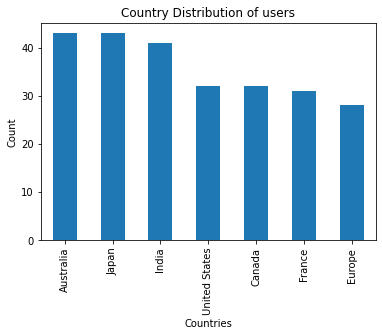

In [ ]:
# Data Insights - Customer distribution in countries

df.Location.value_counts().plot(kind = 'bar')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Country Distribution of users')
plt.show()

In [ ]:
# Number of active users

durations = {}
durations['1-3'] = df[df.Duration.between(1, 3)]['Duration'].count()
durations['4-6'] = df[df.Duration.between(4, 6)]['Duration'].count()
durations['7-9'] = df[df.Duration.between(7, 9)]['Duration'].count()
durations['10-12'] = df[df.Duration.between(10, 12)]['Duration'].count()
durations['13-15'] = df[df.Duration.between(13, 15)]['Duration'].count()
durations

{'1-3': 50, '10-12': 37, '13-15': 60, '4-6': 59, '7-9': 44}

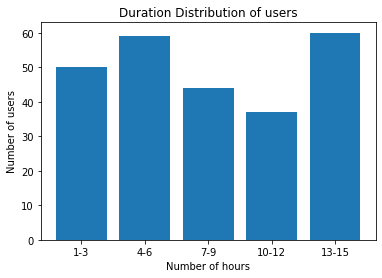

In [ ]:
plt.bar(list(durations.keys()), list(durations.values()))
plt.ylabel('Number of users')
plt.xlabel('Number of hours')
plt.title('Duration Distribution of users')
plt.show()

In [ ]:
df['Channel Used'].value_counts()

Instagram Page    62
Android           52
Web               48
Facebook Page     45
iOS               43
Name: Channel Used, dtype: int64

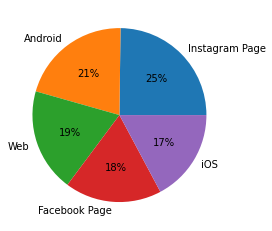

In [ ]:
# Channel Breakdown

plt.pie(df['Channel Used'].value_counts(), labels = ['Instagram Page', 'Android', 'Web', 'Facebook Page', 'iOS'], autopct = "%1.0f%%") # Need to change 
                                                                                                                # it everytime we run previous cell
plt.show()

In [ ]:
df.Gender.value_counts()

F    132
M    118
Name: Gender, dtype: int64

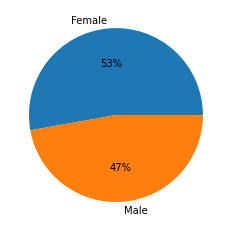

In [ ]:
# Gender Distribution

plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct = "%1.0f%%") # Also need to change this
plt.show()

In [ ]:
# Age distribution

ages = {}

ages['18_25'] = df[df['Age'].between(18, 25)]['Age'].count()
ages['25_35'] = df[df['Age'].between(25, 35)]['Age'].count()
ages['35_45'] = df[df['Age'].between(38, 45)]['Age'].count()
ages['45_65'] = df[df['Age'].between(45, 65)]['Age'].count()
ages['65plus'] = df[df['Age'] > 65]['Age'].count()

ages

{'18_25': 22, '25_35': 45, '35_45': 28, '45_65': 90, '65plus': 64}

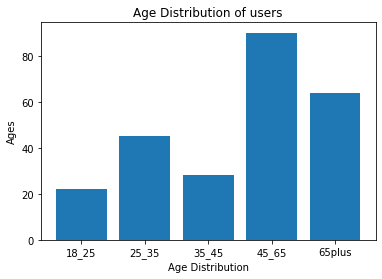

In [ ]:
plt.bar(list(ages.keys()), list(ages.values()))
plt.ylabel('Ages')
plt.xlabel('Age Distribution')
plt.title('Age Distribution of users')
plt.show()

In [ ]:
gender = {'M': 0, 'F': 1}
location = {'United States': 0, 'India': 1, 'France': 2, 'Canada': 3, 'Europe': 4, 'Japan': 5, 'Australia': 6}
channel = {'Web': 0, 'iOS': 1, 'Android': 2, 'Instagram Page': 3, 'Facebook Page': 4}

df.Gender = [gender[item] for item in df.Gender]
df.Location = [location[item] for item in df.Location]
df['Channel Used'] = [channel[item] for item in df['Channel Used']]

In [ ]:
df2 = df.drop(['Date Time'], axis = 1)
df2

,Customer ID,Age,Gender,Channel Used,Location,Duration
0,CUST0,44,0,2,6,13
1,CUST1,42,0,1,6,15
2,CUST2,72,1,2,3,8
3,CUST3,57,1,0,6,5
4,CUST4,21,0,3,6,2
...,...,...,...,...,...,...
245,CUST245,59,1,2,1,13
246,CUST246,30,1,2,5,6
247,CUST247,45,0,2,6,11
248,CUST248,82,0,1,5,8


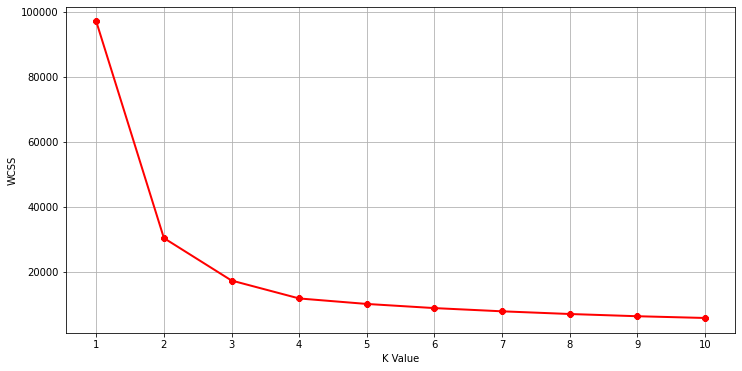

In [ ]:
# K-Means Clustering for grouping customers

from sklearn.cluster import KMeans
import numpy as np

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(df2.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12,6))    
plt.grid()
plt.plot(range(1, 11),wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
# We choose k = 5. Applying K-Means Clustering to group customers.

km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df2.iloc[:, 1:])

df2["label"] = clusters

In [ ]:
df2

,Customer ID,Age,Gender,Channel Used,Location,Duration,label
0,CUST0,44,0,2,6,13,1
1,CUST1,42,0,1,6,15,1
2,CUST2,72,1,2,3,8,0
3,CUST3,57,1,0,6,5,2
4,CUST4,21,0,3,6,2,4
...,...,...,...,...,...,...,...
245,CUST245,59,1,2,1,13,2
246,CUST246,30,1,2,5,6,3
247,CUST247,45,0,2,6,11,1
248,CUST248,82,0,1,5,8,0


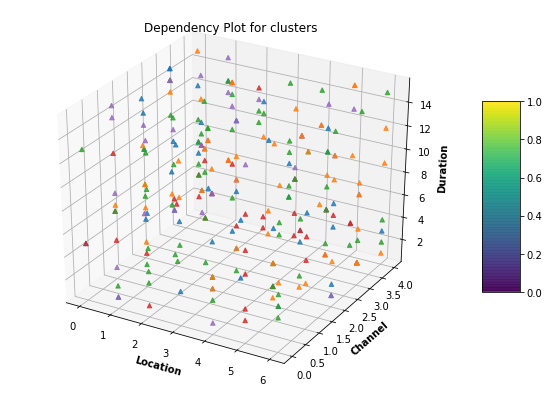

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(df2['Location'][df2.label == 0].tolist(), df2['Channel Used'][df2.label == 0].tolist(), df2['Duration'][df2.label == 0].tolist(), 
                    alpha = 0.8, cmap = my_cmap, marker = '^')
sctt = ax.scatter3D(df2['Location'][df2.label == 1].tolist(), df2['Channel Used'][df2.label == 1].tolist(), df2['Duration'][df2.label == 1].tolist(), 
                    alpha = 0.8, cmap = my_cmap, marker = '^')
sctt = ax.scatter3D(df2['Location'][df2.label == 2].tolist(), df2['Channel Used'][df2.label == 2].tolist(), df2['Duration'][df2.label == 2].tolist(), 
                    alpha = 0.8, cmap = my_cmap, marker = '^')
sctt = ax.scatter3D(df2['Location'][df2.label == 3].tolist(), df2['Channel Used'][df2.label == 3].tolist(), df2['Duration'][df2.label == 3].tolist(), 
                    alpha = 0.8, cmap = my_cmap, marker = '^')
sctt = ax.scatter3D(df2['Location'][df2.label == 4].tolist(), df2['Channel Used'][df2.label == 4].tolist(), df2['Duration'][df2.label == 4].tolist(), 
                    alpha = 0.8, cmap = my_cmap, marker = '^')

plt.title("Dependency Plot for clusters")
ax.set_xlabel('Location', fontweight ='bold') 
ax.set_ylabel('Channel', fontweight ='bold') 
ax.set_zlabel('Duration', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

We can conclude from the given 3D plot that there is no correlation between the factors like Channel, Location and Duration. This is because the data is generated randomly and hence there will be no correlation. If data from a business organization is used, we may find some correlation between duration and gender or duration and location.